In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error


from xgboost  import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [92]:
data = pd.read_csv("/home/mert/Desktop/MLOPS/bitcoin-forecast/data/external/btc_usd_features.csv")

data_valid = data[-90:].copy()
data = data[:-90].copy()
data = data.drop(['date'], axis=1).copy()

y = data['btc_vwap_org'].copy()
X = data.drop(['btc_vwap', "btc_vwap_org"], axis=1)

valid_y = data_valid['btc_vwap_org'].copy()
valid_X = data_valid.drop(['btc_vwap', 'btc_vwap_org', 'date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

rmse_scores = []
mae_scores = []
mape_scores = []

## Models

### Linear Regression

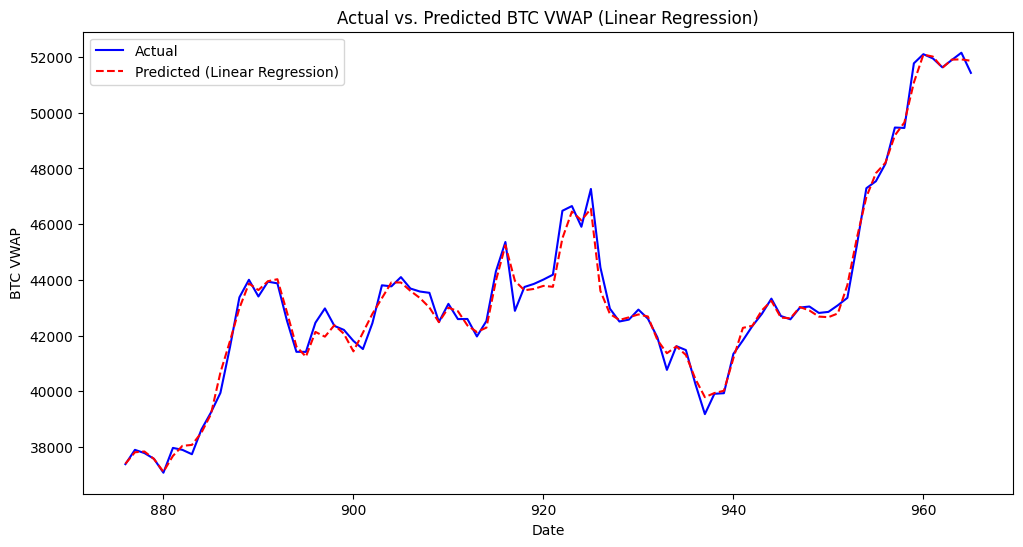

In [93]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear_reg = linear_reg_model.predict(valid_X)

rmse = np.sqrt(mean_squared_error(valid_y, y_pred_linear_reg))
mape = mean_absolute_percentage_error(valid_y, y_pred_linear_reg)

model_name = "Linear Regression"
mape_scores.append((model_name, mape))
rmse_scores.append((model_name, rmse))


plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
plt.plot(data.index[-len(valid_y):], y_pred_linear_reg, label='Predicted (Linear Regression)', linestyle='dashed', color='red')
plt.title('Actual vs. Predicted BTC VWAP (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('BTC VWAP')
plt.legend()
plt.show()


### Decision Tree

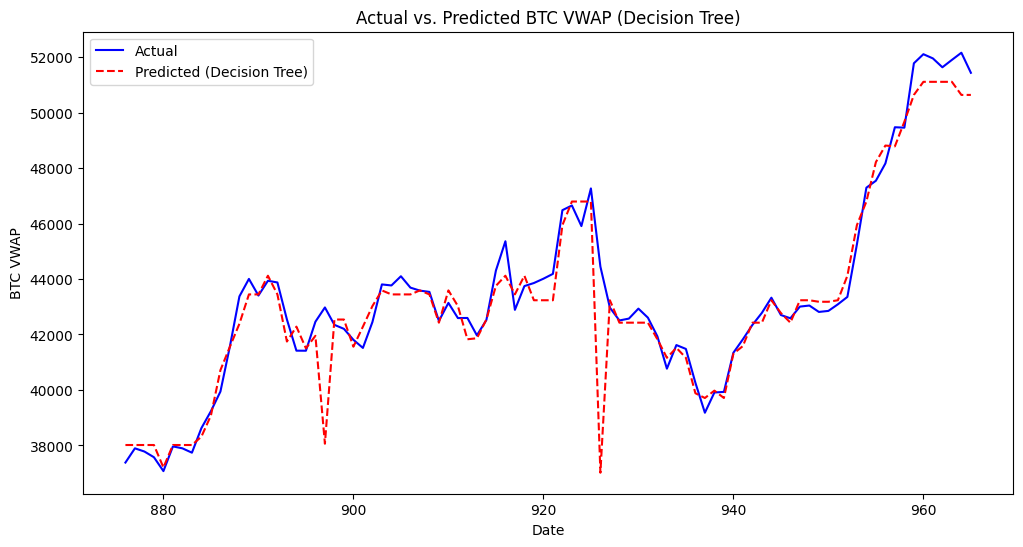

In [94]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(valid_X)

rmse = np.sqrt(mean_squared_error(valid_y, y_pred_decision_tree))
mape = mean_absolute_percentage_error(valid_y, y_pred_decision_tree)

model_name = "Decision Tree"
mape_scores.append((model_name, mape))
rmse_scores.append((model_name, rmse))

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
plt.plot(data.index[-len(valid_y):], y_pred_decision_tree, label='Predicted (Decision Tree)', linestyle='dashed', color='red')
plt.title('Actual vs. Predicted BTC VWAP (Decision Tree)')
plt.xlabel('Date')
plt.ylabel('BTC VWAP')
plt.legend()
plt.show()

### Random Forest

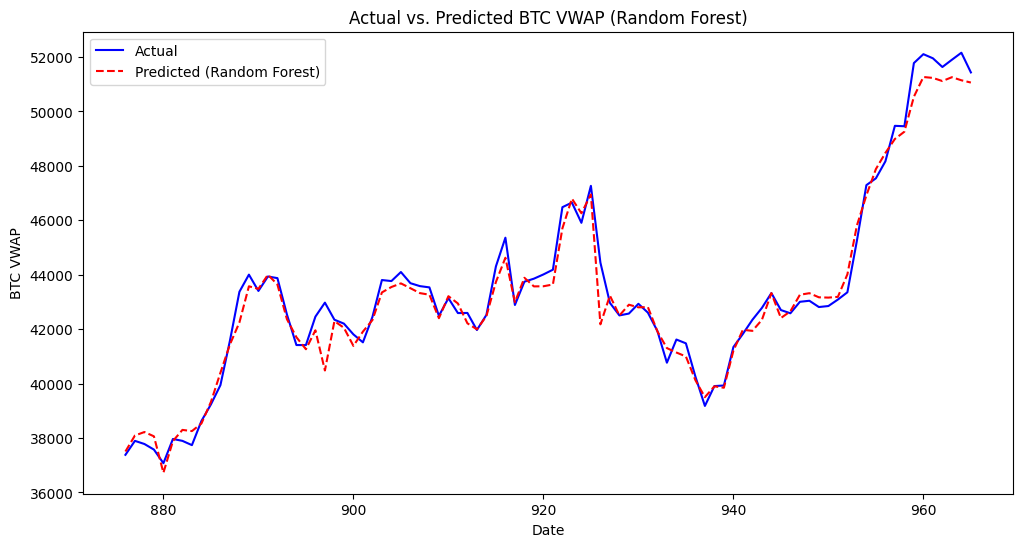

In [95]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(valid_X)

rmse = np.sqrt(mean_squared_error(valid_y, y_pred_random_forest))
mape = mean_absolute_percentage_error(valid_y, y_pred_random_forest)

model_name = "Random Forest"
mape_scores.append((model_name, mape))
rmse_scores.append((model_name, rmse))

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
plt.plot(data.index[-len(valid_y):], y_pred_random_forest, label='Predicted (Random Forest)', linestyle='dashed', color='red')
plt.title('Actual vs. Predicted BTC VWAP (Random Forest)')
plt.xlabel('Date')
plt.ylabel('BTC VWAP')
plt.legend()
plt.show()

### Gradient Boosting

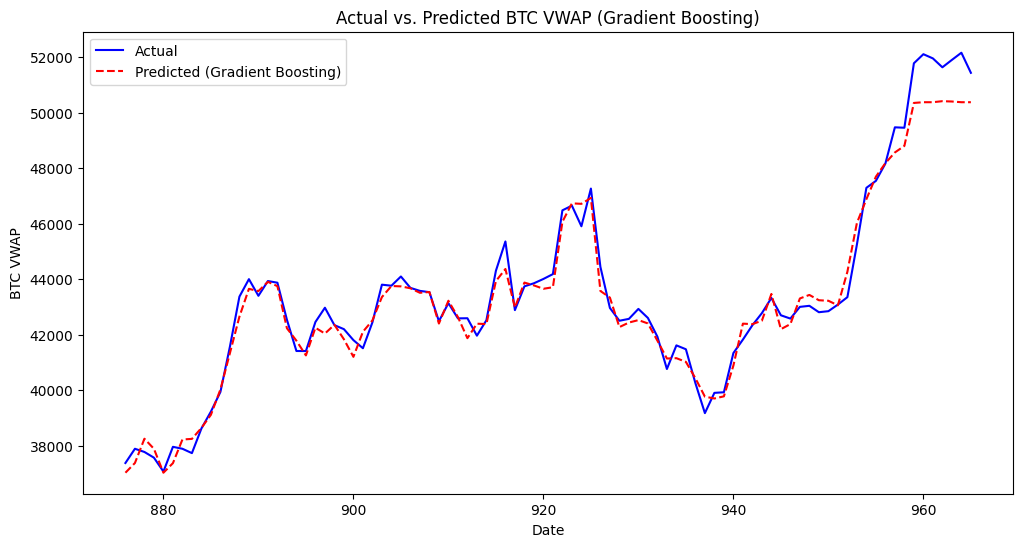

In [96]:
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(valid_X)

rmse = np.sqrt(mean_squared_error(valid_y, y_pred_gradient_boosting))
mape = mean_absolute_percentage_error(valid_y, y_pred_gradient_boosting)

model_name = "Gradient Boosting"
mape_scores.append((model_name, mape))
rmse_scores.append((model_name, rmse))

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
plt.plot(data.index[-len(valid_y):], y_pred_gradient_boosting, label='Predicted (Gradient Boosting)', linestyle='dashed', color='red')
plt.title('Actual vs. Predicted BTC VWAP (Gradient Boosting)')
plt.xlabel('Date')
plt.ylabel('BTC VWAP')
plt.legend()
plt.show()

### XGBoost

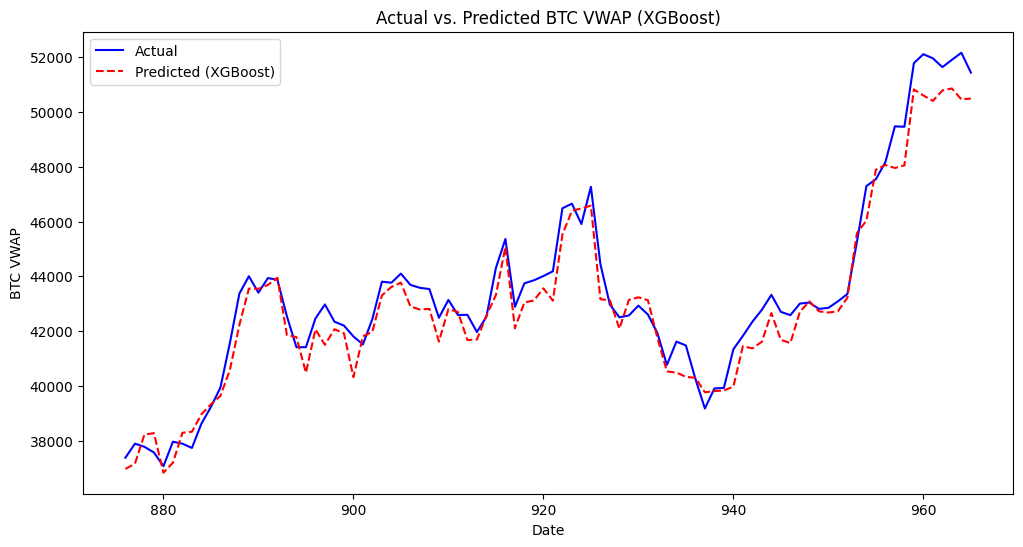

In [97]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(valid_X)

rmse = np.sqrt(mean_squared_error(valid_y, y_pred_xgb))
mape = mean_absolute_percentage_error(valid_y, y_pred_xgb)

model_name = "XGBoost"
mape_scores.append((model_name, mape))
rmse_scores.append((model_name, rmse))

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
plt.plot(data.index[-len(valid_y):], y_pred_xgb, label='Predicted (XGBoost)', linestyle='dashed', color='red')
plt.title('Actual vs. Predicted BTC VWAP (XGBoost)')
plt.xlabel('Date')
plt.ylabel('BTC VWAP')
plt.legend()
plt.show()

### LightGBM

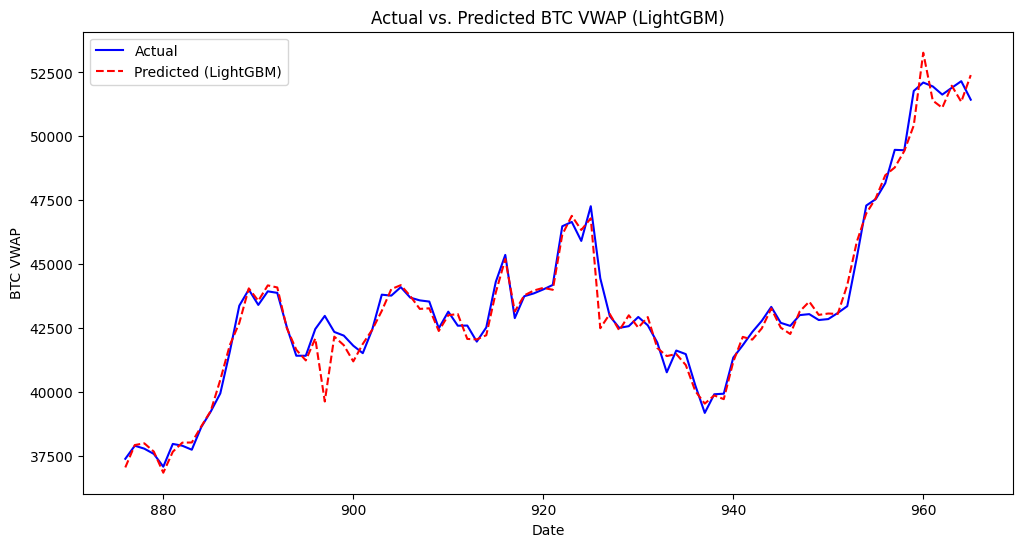

In [98]:
lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(valid_X)

rmse = np.sqrt(mean_squared_error(valid_y, y_pred_lgb))
mape = mean_absolute_percentage_error(valid_y, y_pred_lgb)

model_name = "LightGBM"
mape_scores.append((model_name, mape))
rmse_scores.append((model_name, rmse))

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
plt.plot(data.index[-len(valid_y):], y_pred_lgb, label='Predicted (LightGBM)', linestyle='dashed', color='red')
plt.title('Actual vs. Predicted BTC VWAP (LightGBM)')
plt.xlabel('Date')
plt.ylabel('BTC VWAP')
plt.legend()
plt.show()

### Ada Boost

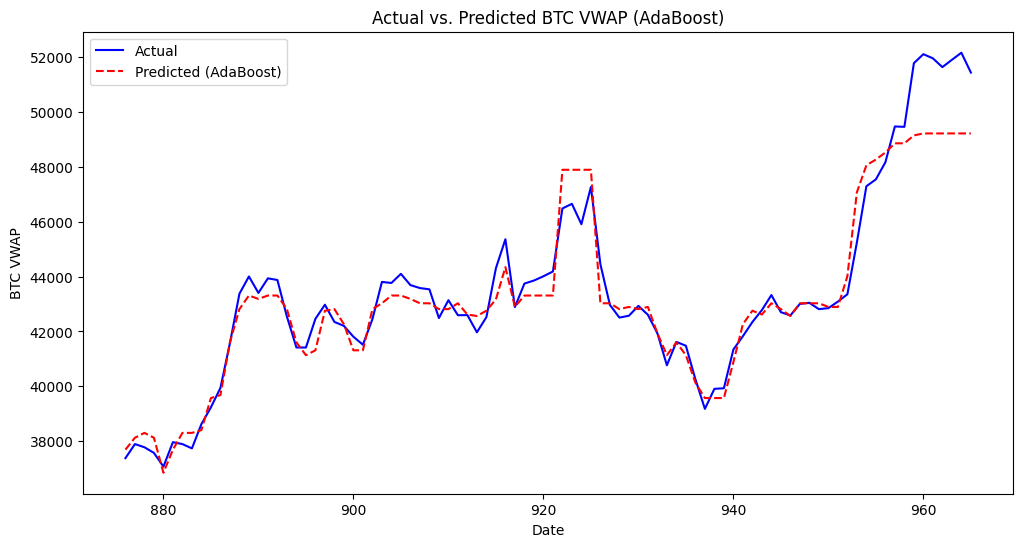

In [99]:
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(valid_X)

rmse = np.sqrt(mean_squared_error(valid_y, y_pred_adaboost))
mape = mean_absolute_percentage_error(valid_y, y_pred_adaboost)

model_name = "Ada Boost"
mape_scores.append((model_name, mape))
rmse_scores.append((model_name, rmse))

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(valid_y):], valid_y, label='Actual', color='blue')
plt.plot(data.index[-len(valid_y):], y_pred_adaboost, label='Predicted (AdaBoost)', linestyle='dashed', color='red')
plt.title('Actual vs. Predicted BTC VWAP (AdaBoost)')
plt.xlabel('Date')
plt.ylabel('BTC VWAP')
plt.legend()
plt.show()

### Naive Forecastting

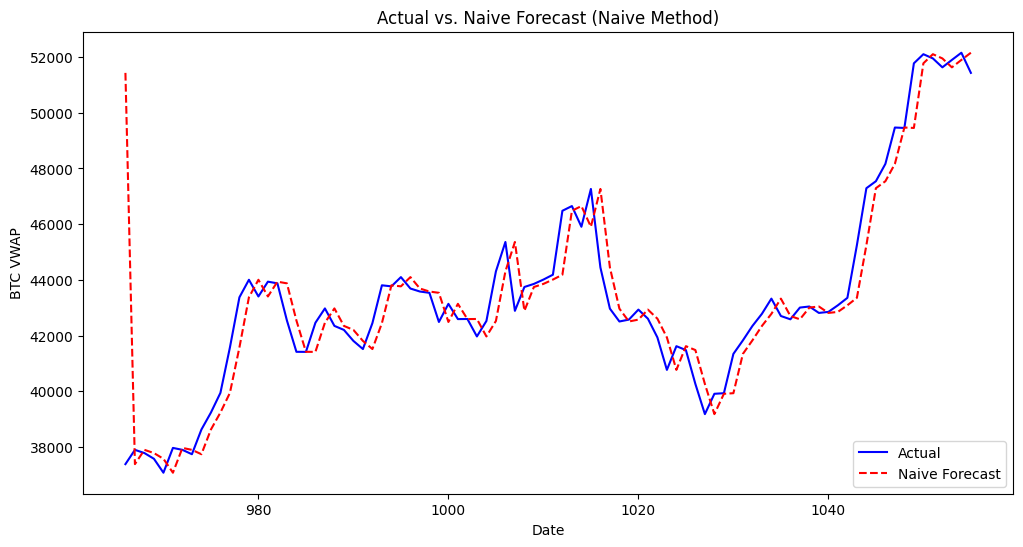

Naive Forecast - RMSE: 1742.33, MAE: 0.02


In [102]:
y_pred_naive = np.roll(valid_y, shift=1)
y_pred_naive[0] = valid_y.iloc[-1] 


rmse_naive = np.sqrt(mean_squared_error(valid_y, y_pred_naive))
mape_naive = mean_absolute_percentage_error(valid_y, y_pred_naive)
# Naive forecast grafiğini çizme
plt.figure(figsize=(12, 6))
plt.plot(data_valid.index, valid_y, label='Actual', color='blue')
plt.plot(data_valid.index, y_pred_naive, label='Naive Forecast', linestyle='dashed', color='red')
plt.title('Actual vs. Naive Forecast (Naive Method)')
plt.xlabel('Date')
plt.ylabel('BTC VWAP')
plt.legend()
plt.show()

# Sonuçları yazdırma
print(f"Naive Forecast - RMSE: {rmse_naive:.2f}, MAPE: {mape_naive:.2f}")

## Visualizing scores and forecast

In [ ]:
predictions_df = pd.DataFrame({
    'Date': data_valid.index,
    'Actual': valid_y,
    'Linear Regression': y_pred_linear_reg,
    'Decision Tree': y_pred_decision_tree,
    'Random Forest': y_pred_random_forest, 
    'XGBoost': y_pred_xgb,
    'LightGBM': y_pred_lgb,
    'Ada Boost': y_pred_adaboost,
    'Gradient Boost': y_pred_gradient_boosting    
})

melted_df = predictions_df.melt(id_vars='Date', value_vars=['Actual', 'Random Forest', 'XGBoost', 'LightGBM', 'Linear Regression','Decision Tree','Ada Boost','Gradient Boost'], var_name='Model', value_name='Value')
fig = px.line(melted_df, x='Date', y='Value', color='Model', title='Model Predictions vs Actual Values for the Last 90 Days')
fig.show()

/home/mert/.local/lib/python3.10/site-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
rmse_scores_sorted = sorted(rmse_scores, key=lambda x: x[1])
mape_scores_sorted = sorted(mape_scores, key=lambda x: x[1])

rmse_df_sorted = pd.DataFrame(rmse_scores_sorted, columns=['Model', 'RMSE'])
mape_df_sorted = pd.DataFrame(mape_scores_sorted, columns=['Model', 'MAPE'])

fig_rmse_sorted = px.bar(rmse_df_sorted, x='Model', y='RMSE', title='RMSE Scores', labels={'RMSE': 'Score'},
                         color='RMSE', color_continuous_scale='Viridis')

fig_mape_sorted = px.bar(mape_df_sorted, x='Model', y='MAPE', title='MAPE Scores', labels={'MAPE': 'Score'},
                         color='MAPE', color_continuous_scale='Viridis')

fig_rmse_sorted.show()
fig_mape_sorted.show()

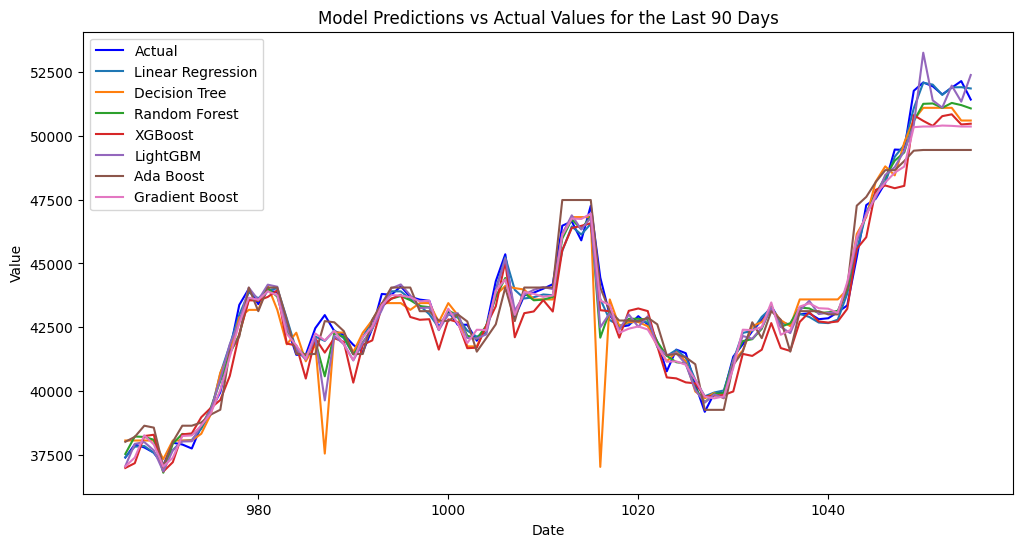

In [ ]:
predictions_df = pd.DataFrame({
    'Date': data_valid.index,
    'Actual': valid_y,
    'Linear Regression': y_pred_linear_reg,
    'Decision Tree': y_pred_decision_tree,
    'Random Forest': y_pred_random_forest, 
    'XGBoost': y_pred_xgb,
    'LightGBM': y_pred_lgb,
    'Ada Boost': y_pred_adaboost,
    'Gradient Boost': y_pred_gradient_boosting    
})

plt.figure(figsize=(12, 6))
plt.plot(predictions_df['Date'], predictions_df['Actual'], label='Actual', color='blue')

for model_name in predictions_df.columns[2:]:
    plt.plot(predictions_df['Date'], predictions_df[model_name], label=model_name)

plt.title('Model Predictions vs Actual Values for the Last 90 Days')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


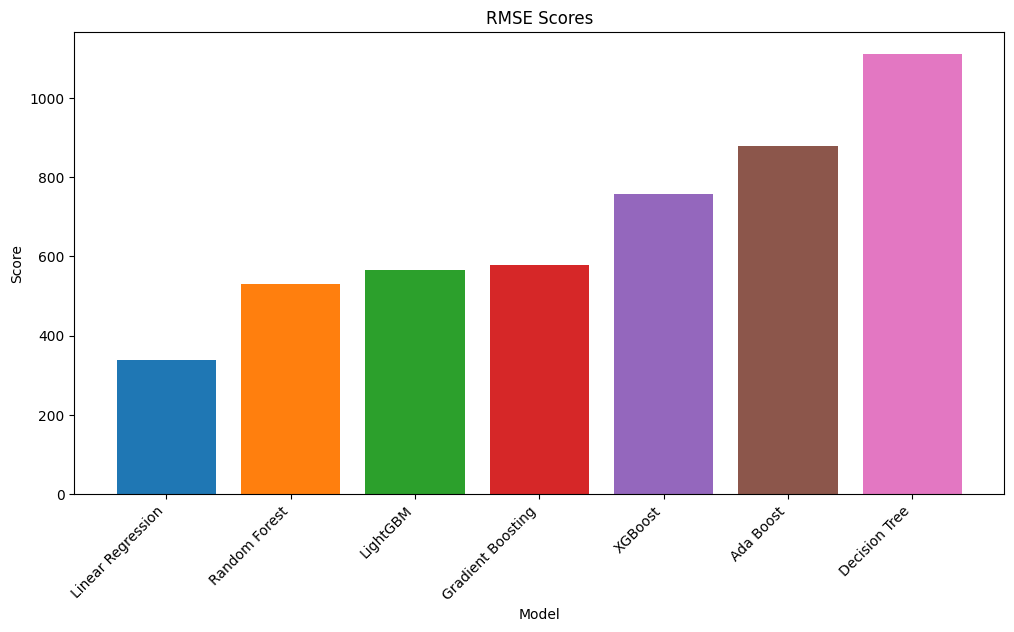

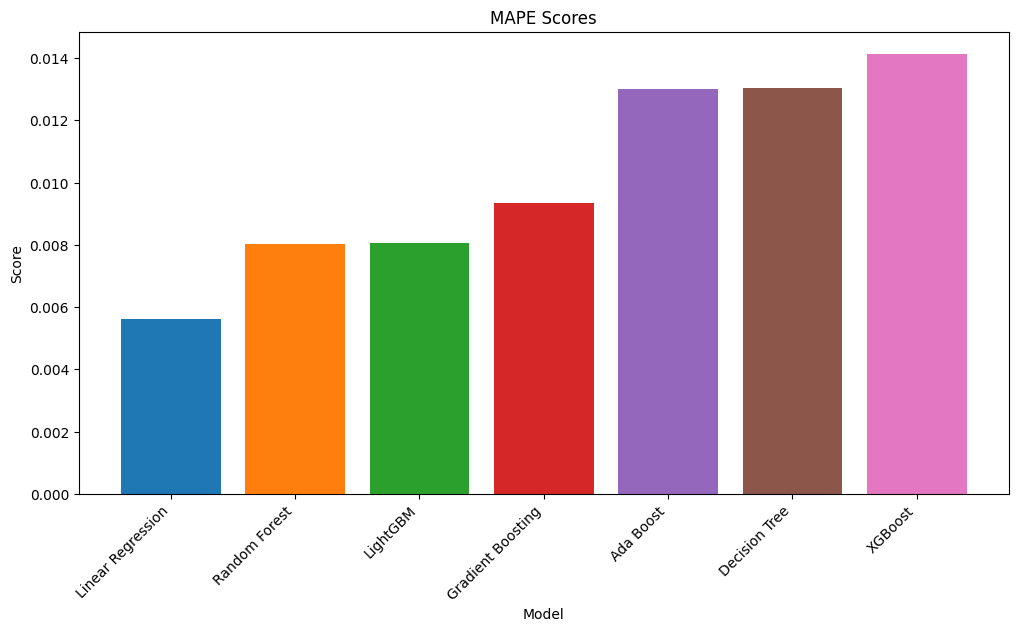

In [ ]:
scores_df = pd.DataFrame({
    'Model': [item[0] for item in rmse_scores],
    'RMSE': [item[1] for item in rmse_scores],
    'MAPE': [item[1] for item in mape_scores]
})

scores_df_rmse = scores_df.sort_values(by='RMSE')
scores_df_mape = scores_df.sort_values(by='MAPE')
colors = plt.cm.tab10(np.arange(len(scores_df_rmse)))

plt.figure(figsize=(12, 6))
plt.bar(scores_df_rmse['Model'], scores_df_rmse['RMSE'], color=colors)
plt.title('RMSE Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(scores_df_mape['Model'], scores_df_mape['MAPE'], color=colors)
plt.title('MAPE Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
scores_df_rmse

,Model,RMSE,MAPE
0,Linear Regression,338.070045,0.005620
2,Random Forest,530.011619,0.008018
5,LightGBM,564.490745,0.008048
3,Gradient Boosting,577.358344,0.009350
4,XGBoost,757.143642,0.014135
6,Ada Boost,879.909181,0.013009
1,Decision Tree,1111.536291,0.013026
